1. $f({x_1},{x_2}) = 2x_1^2 + 3x_2^2 + 1$

2. ${}_0^R \mathscr{D}_{x_1}^\alpha f(x_1,x_2)=sign(x_1)\frac{{4}}{{\Gamma (3 - \alpha )}}{|x_1|^{2 - \alpha }} + {e^{ - \theta i}} \bullet sign(x_1) \frac{3x_2^2+1}{{\Gamma \left( {1 - \alpha } \right)}}{(|x_1|+\epsilon)^{ - \alpha }}$

3. ${}_0^R \mathscr{D}_{x_2}^\alpha f(x_1,x_2)={e^{ - \theta i}} \bullet sign(x_2)\frac{{2x_1^2+1}}{{\Gamma (1 - \alpha )}}{(|x_2|+\epsilon)^{ - \alpha }} + sign(x_2) \frac{6}{{\Gamma \left( {3 - \alpha } \right)}}{|x_2|^{2 - \alpha }}$

In [1]:
import numpy as np
from scipy.special import gamma

#Equation 1
def expression1_function(x1, x2):
    return 2*x1**2 + 3*x2**2 + 1

#Equation 2 and 3 about FGD
def expression1_differentiation(x1,x2, alpha=0.9, epsilon=1e-8):
    sign_x1 = np.sign(x1)
    abs_x1 = np.abs(x1)
    sign_x2 = np.sign(x2)
    abs_x2 = np.abs(x2)
    #Equation 2 about FGD
    term1 = sign_x1 * (4/gamma(3 - alpha)) * (abs_x1 **(2-alpha))
    term2 = sign_x1 * ((3*x2**2+1)/gamma(1 - alpha)) * ((abs_x1 + epsilon)**(-alpha))
    #Equation 3 about FGD
    term3 = sign_x2 * (6/gamma(3 - alpha)) * (abs_x2 **(2-alpha))
    term4 = sign_x2 * ((2*x1**2+1)/gamma(1 - alpha)) * ((abs_x2 + epsilon)**(-alpha))

    return term1 + term2 , term3 + term4

#Equation 2 and 3 about FGD-ED
def expression1_differentiation_ED(x1,x2, i, alpha=0.9, epsilon=1e-8, k=0.9):
    sign_x1 = np.sign(x1)
    abs_x1 = np.abs(x1)
    sign_x2 = np.sign(x2)
    abs_x2 = np.abs(x2)
    #Equation 2 about FGD-ED
    term1 = sign_x1 * (4/gamma(3 - alpha)) * (abs_x1 **(2-alpha))
    term2 = np.exp(-k * i) * sign_x1 * ((3*x2**2+1)/gamma(1 - alpha)) * ((abs_x1 + epsilon)**(-alpha))
    #Equation 3 about FGD-ED
    term3 = sign_x2 * (6/gamma(3 - alpha)) * (abs_x2 **(2-alpha))
    term4 = np.exp(-k * i) * sign_x2 * ((2*x1**2+1)/gamma(1 - alpha)) * ((abs_x2 + epsilon)**(-alpha))

    return term1 + term2, term3 + term4

#FGD
def FGD(x1 = 1, x2 = 1, lr = 0.3, alpha=0.9, max_iter=10, epsilon=1e-8):
    dif_x1 = [x1]
    dif_x2 = [x2]
    for i in range(max_iter):
        gradient1, gradient2 = expression1_differentiation(x1, x2, alpha, epsilon)
        x1 -= lr * gradient1
        x2 -= lr * gradient2
        dif_x1.append(x1)
        dif_x2.append(x2)
    return dif_x1, dif_x2

#FGD_ED
def FGD_ED(x1 = 1, x2 = 1, lr = 0.3, alpha=0.9, max_iter=10, epsilon=1e-8, k=0.9):
    dif_x1 = [x1]
    dif_x2 = [x2]
    for i in range(max_iter):
        gradient1, gradient2 = expression1_differentiation_ED(x1, x2, i, alpha, epsilon, k)
        x1 -= lr * gradient1
        x2 -= lr * gradient2
        dif_x1.append(x1)
        dif_x2.append(x2)
    return dif_x1, dif_x2

In [134]:
import matplotlib.pyplot as plt
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'
plt.rcParams['text.usetex'] = True
plt.rcParams['text.latex.preamble'] = r'\usepackage{amsmath, amssymb}'
custom_params = {
    'font.size': 20,
    'lines.linewidth': 1,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 18,
}

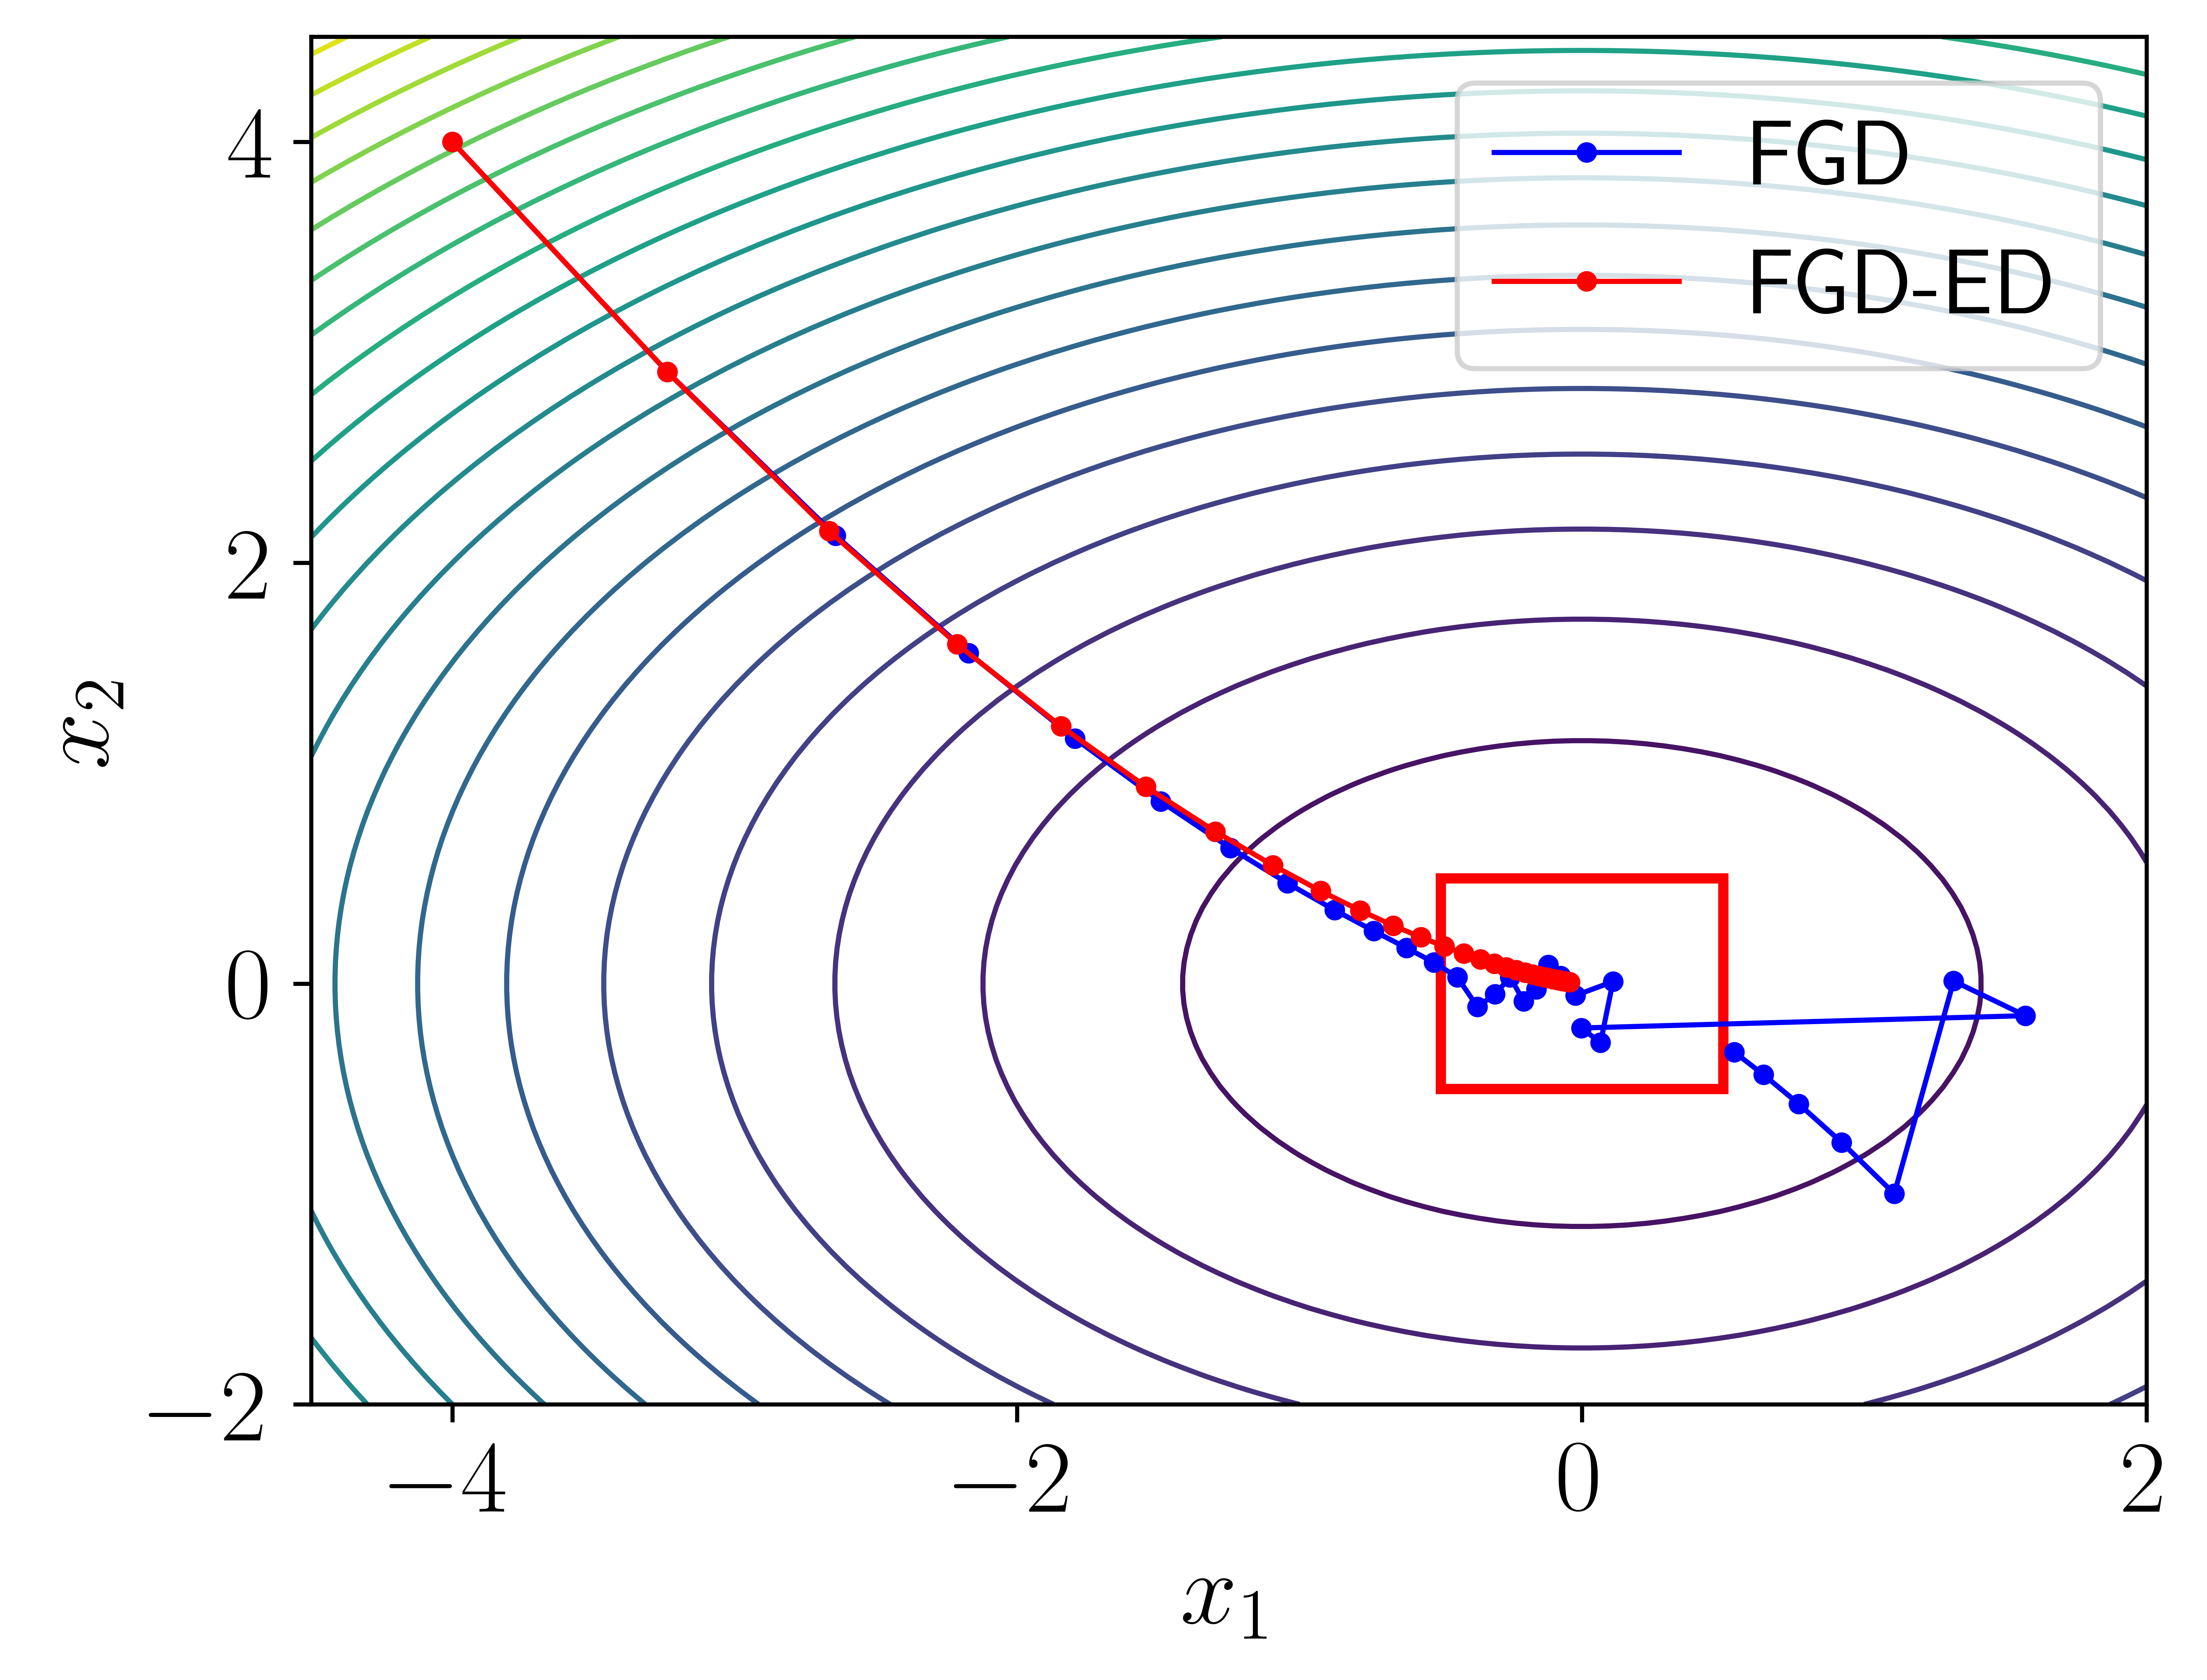

In [ ]:
import numpy as np
import torch as t
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

alpha = 0.9  #0.3,0.5,0.7,0.9,1.0. For alpha = 1.0, FG, FGD, and FGD-ED yield equivalent results.
alpha1 = 0.9  #0.3,0.5,0.7,0.9
epsilon = 1e-8
max_iter = 30  #30, max_iter = 50 in fig2(d) and (e).
lr = 4e-2 
x1 = -4
x2 = 4

FGD_X1_1, FGD_X2_1= FGD(x1, x2, lr, alpha, max_iter, epsilon=1e-8)
FGD_ED_X1_1, FGD_ED_X2_1= FGD_ED(x1, x2, lr, alpha1, max_iter, epsilon=1e-8, k = 0.9)

plt.figure(dpi=1200)
plt.rcParams.update(custom_params)

# Fig.2(a,b,c,d)

# Plot contour lines
x = np.linspace(-4.5, 2, 100)
y = np.linspace(-2, 4.5, 100)
X, Y = np.meshgrid(x, y)
Z = expression1_function(X,Y)  

plt.contour(X, Y, Z, levels=20, cmap='viridis')  

# Plot the trajectory  of FGD and FGD-ED
plt.plot(FGD_X1_1, FGD_X2_1, marker='o', markersize=3, color='blue', label=r'FGD')
plt.plot(FGD_ED_X1_1, FGD_ED_X2_1, marker='o', markersize=3, color='red', label=r'FGD-ED')

# Zoom area
zoom_area = [-0.5, 0.5, -0.5, 0.5]  # x1min, x1max, x2min, x2max
rect = Rectangle((zoom_area[0], zoom_area[2]), 
                 zoom_area[1]-zoom_area[0], 
                 zoom_area[3]-zoom_area[2],
                 linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)

plt.xlim(-4.5, 2)
plt.ylim(-2, 4.5)

plt.ticklabel_format(axis='both', style='sci', scilimits=(2, 6))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

plt.savefig('picture/fig2/Fig2'+'_'+str(alpha1)+'.svg',bbox_inches='tight',format='svg')
plt.savefig('picture/fig2/Fig2'+'_'+str(alpha1)+'.pdf',bbox_inches='tight',format='pdf')

# Fig.2(d)
# plt.scatter(*(0,0), color='gray', marker='*', s=400, 
#            edgecolor='white', linewidth=1, label='Integer-order \n extremum point')
# plt.legend()
# plt.savefig('picture/fig2/Fig2'+'_GD_and_FGD-ED'+'.svg',bbox_inches='tight',format='svg')
# plt.savefig('picture/fig2/Fig2'+'_GD_and_FGD-ED'+'.pdf',bbox_inches='tight',format='pdf')

# Fig.2(e)
# plt.xlim(-0.15, 0.01)
# plt.ylim(-0.01, 0.04)
# plt.scatter(*(0,0), color='gray', marker='*', s=400, 
#            edgecolor='white', linewidth=1, label='Integer-order \n extremum point')
# plt.legend()
# plt.savefig('picture/fig2/Fig2'+'_GD_and_FGD-ED_(e)'+'.svg',bbox_inches='tight',format='svg')
# plt.savefig('picture/fig2/Fig2'+'_GD_and_FGD-ED_(e)'+'.pdf',bbox_inches='tight',format='pdf')

plt.show()

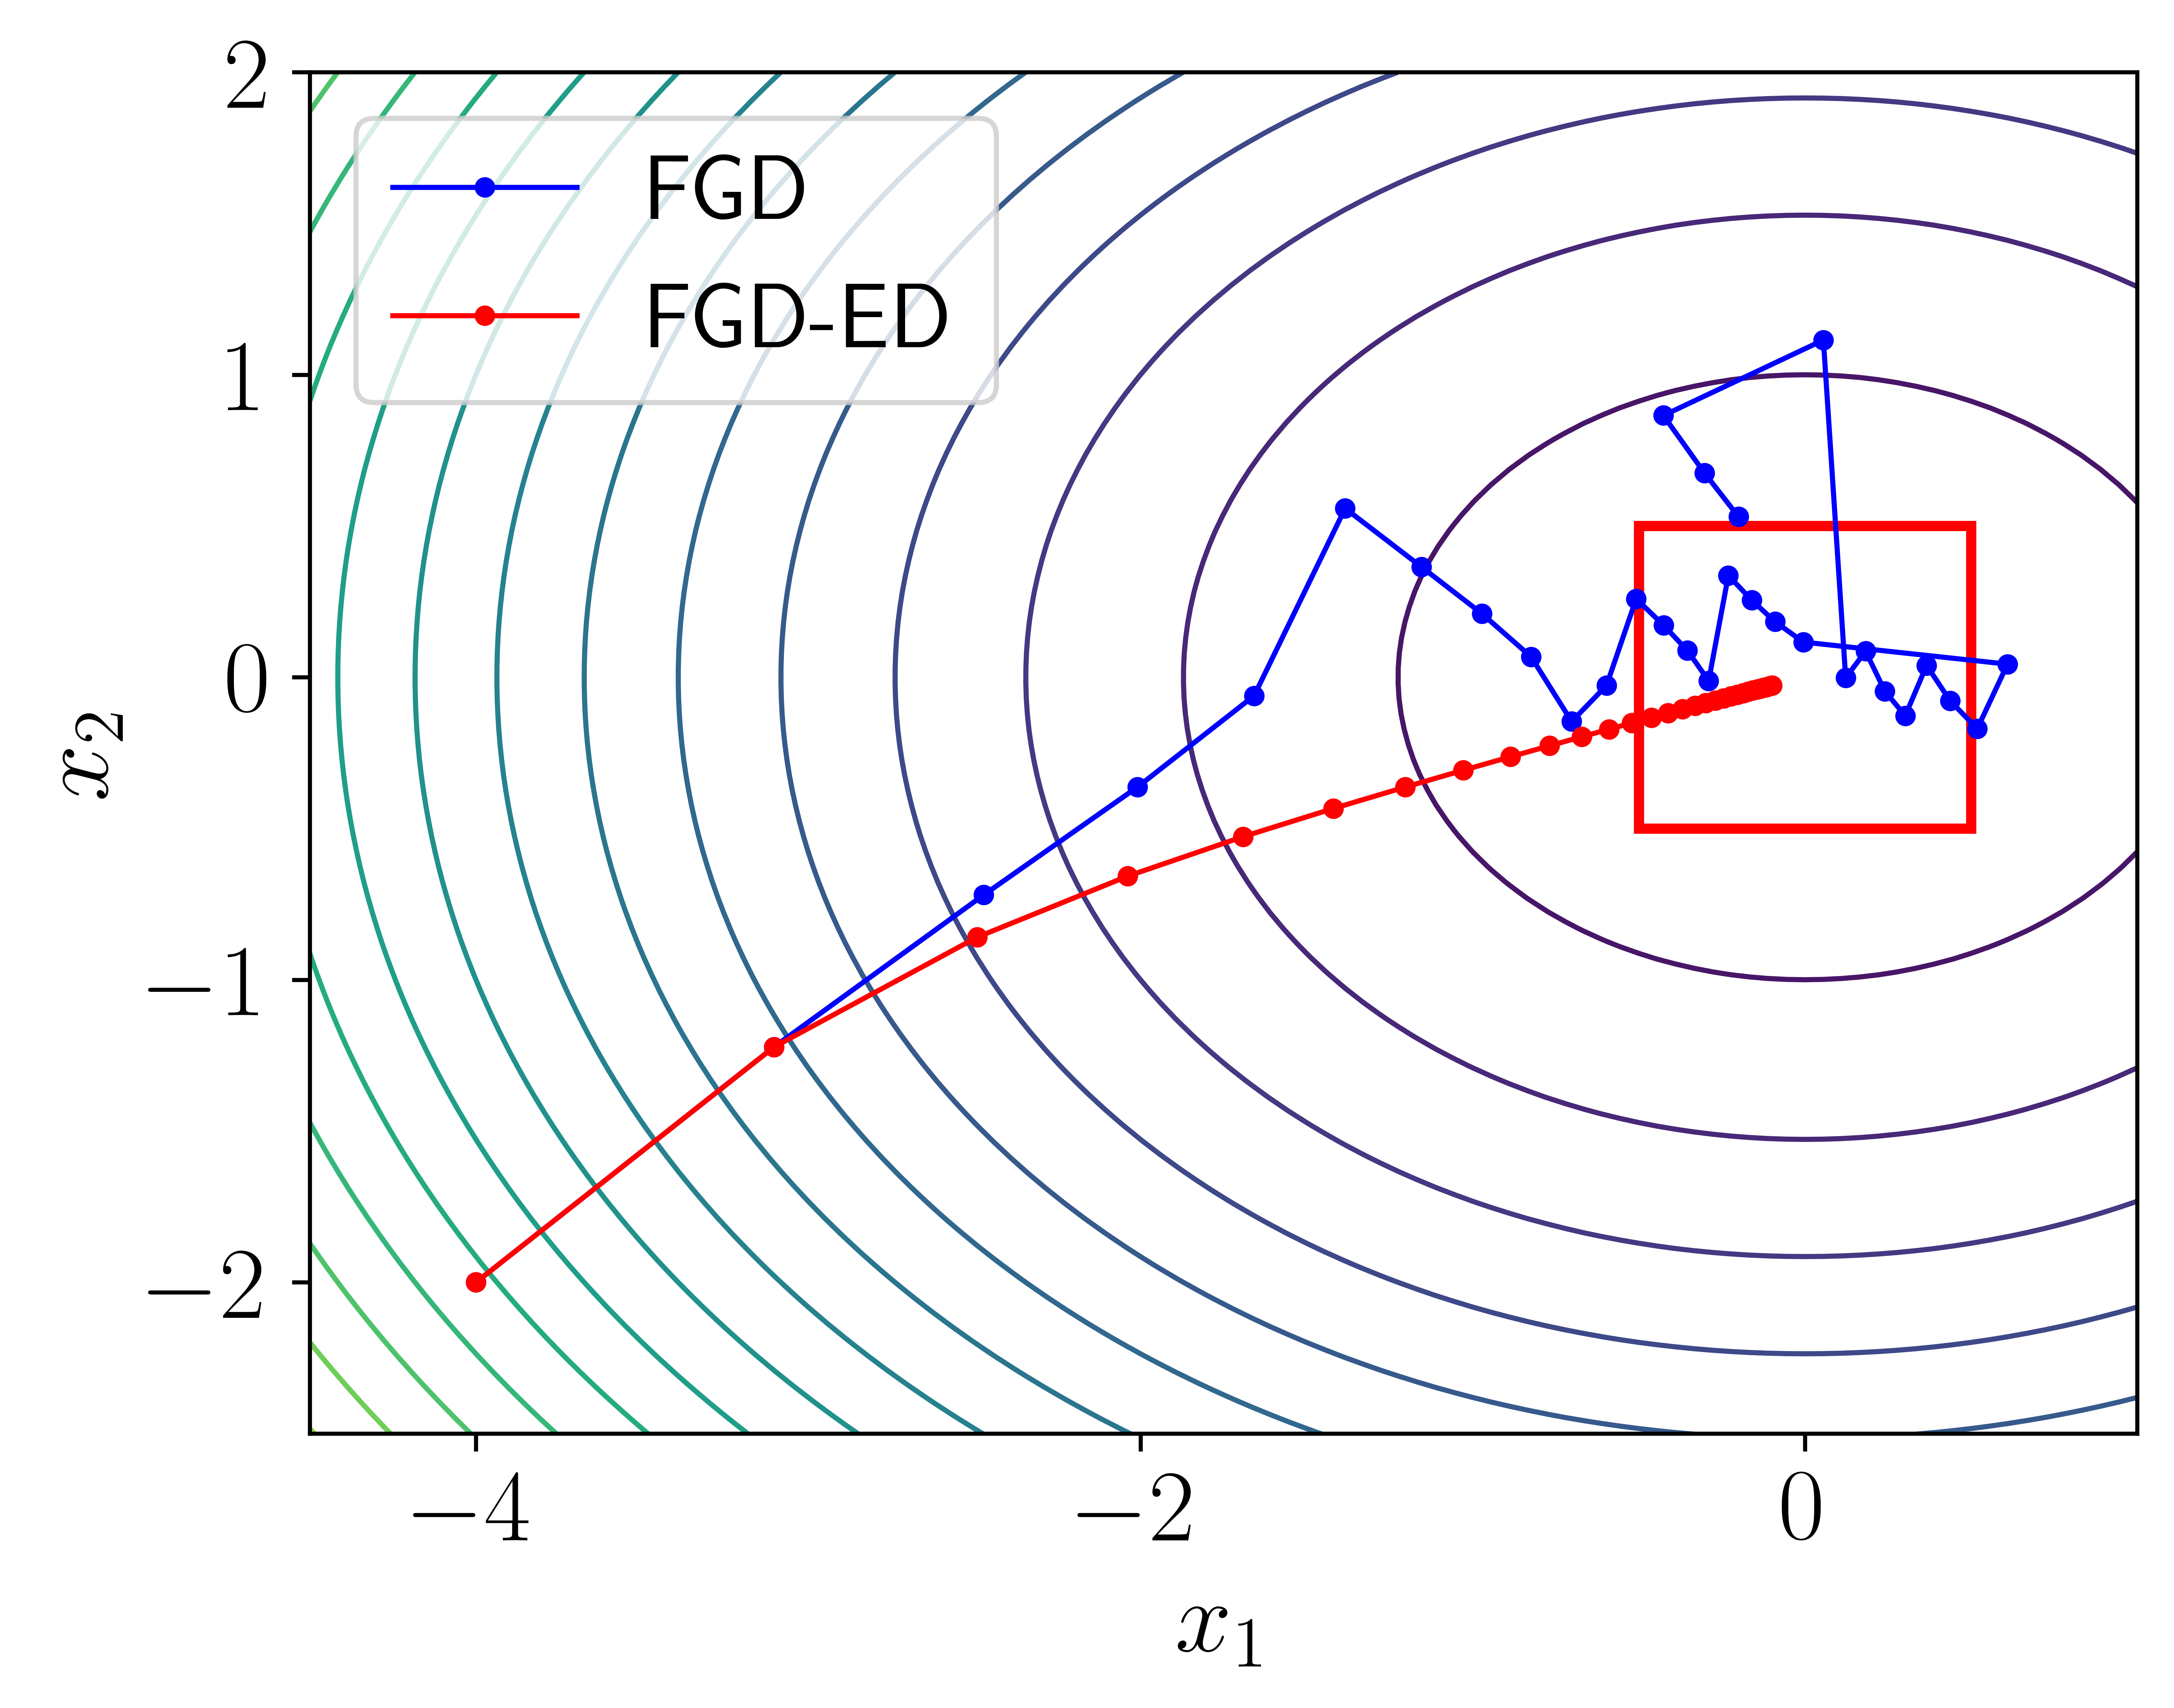

In [ ]:
import numpy as np
import torch as t
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

#Fig2(f)
alpha = 0.7  #0.3,0.5,0.7,0.9,1.0. For alpha = 1.0, FG, FGD, and FGD-ED yield equivalent results.
alpha1 = 0.7  #0.3,0.5,0.7,0.9
epsilon = 1e-8
max_iter = 30  #30, max_iter = 50 in fig2(e) and (f).
lr = 4e-2 
x1 = -4
x2 = -2

FGD_X1_1, FGD_X2_1= FGD(x1, x2, lr, alpha, max_iter, epsilon=1e-8)
FGD_ED_X1_1, FGD_ED_X2_1= FGD_ED(x1, x2, lr, alpha1, max_iter, epsilon=1e-8, k = 0.9)

plt.figure(dpi=1200)
plt.rcParams.update(custom_params)

# Fig.2(a,b,c,d)

# Plot contour lines
x = np.linspace(-4.5, 1, 100)
y = np.linspace(-3, 2, 100)
X, Y = np.meshgrid(x, y)
Z = expression1_function(X,Y)  

plt.contour(X, Y, Z, levels=20, cmap='viridis')  

# Plot the trajectory  of FGD and FGD-ED
plt.plot(FGD_X1_1, FGD_X2_1, marker='o', markersize=3, color='blue', label=r'FGD')
plt.plot(FGD_ED_X1_1, FGD_ED_X2_1, marker='o', markersize=3, color='red', label=r'FGD-ED')

# Zoom area
zoom_area = [-0.5, 0.5, -0.5, 0.5]  # x1min, x1max, x2min, x2max
rect = Rectangle((zoom_area[0], zoom_area[2]), 
                 zoom_area[1]-zoom_area[0], 
                 zoom_area[3]-zoom_area[2],
                 linewidth=2, edgecolor='red', facecolor='none')
plt.gca().add_patch(rect)

plt.xlim(-4.5, 1)
plt.ylim(-2.5, 2)

plt.ticklabel_format(axis='both', style='sci', scilimits=(2, 6))
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()

plt.savefig('picture/fig2/Fig2'+'_'+str(alpha1)+'(-4,-2).svg',bbox_inches='tight',format='svg')
plt.savefig('picture/fig2/Fig2'+'_'+str(alpha1)+'(-4,-2).pdf',bbox_inches='tight',format='pdf')

plt.show()